In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data

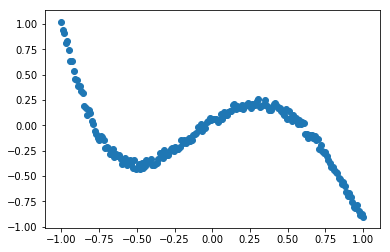

In [2]:
X = np.linspace(-1,1,200)
e = 0.1*np.random.rand(X.shape[0])
Y = (X**4)-2*(X**3)-X**2+X+e
plt.scatter(X,Y)
plt.show()

### Utils

In [3]:
def regression(X, Y):
    W = ((np.linalg.inv((X.T@X)))@X.T)@Y
    W = W.reshape([-1,1])
    Y_ = X@W
    return Y_

### Linear

In [4]:
def linear_base(X, k):
    n = X.shape[0]
    base = np.array([X**i for i in range(k+1)]).T
    return base

def linear_reg(X, Y, k=5):
    base = linear_base(X, k)
    Y_ = regression(base, Y)
    return Y_

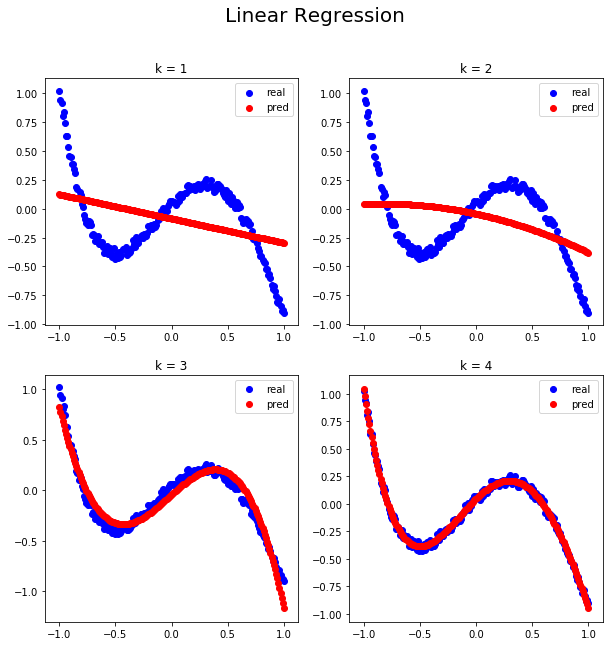

In [5]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Linear Regression", fontsize=20)

ks = [1,2,3,4]
shape = [2,2]
for i,k in enumerate(ks):
    Y_ = linear_reg(X, Y, k)
    plt.subplot(*shape,i+1)
    plt.scatter(X, Y, c = 'b', label='real')
    plt.scatter(X, Y_, c= 'r', label='pred')
    plt.title('k = '+str(k))
    plt.legend()
plt.show()

### Gaussian Kernel

In [6]:
def kernel_base(X, k, sigma=1):
    n = X.shape[0]
    rand = np.random.choice(range(n), size=k)
    u = X[rand]
    u = u.reshape([k,-1])
    X = X.reshape([n,1,1])
    d = np.tile(X, [1,k,1])
    d = -(((d - u)/sigma)**2)/2
    d = np.exp(d)
    ones = np.full(shape=[n,1,1], fill_value=1)
    I = np.hstack([ones,d]).reshape(n,-1)
    return I 

def kernel_reg(X, Y, k=5, sigma=1):
    I = kernel_base(X, k, sigma)
    pred = regression(I, Y)
    return pred

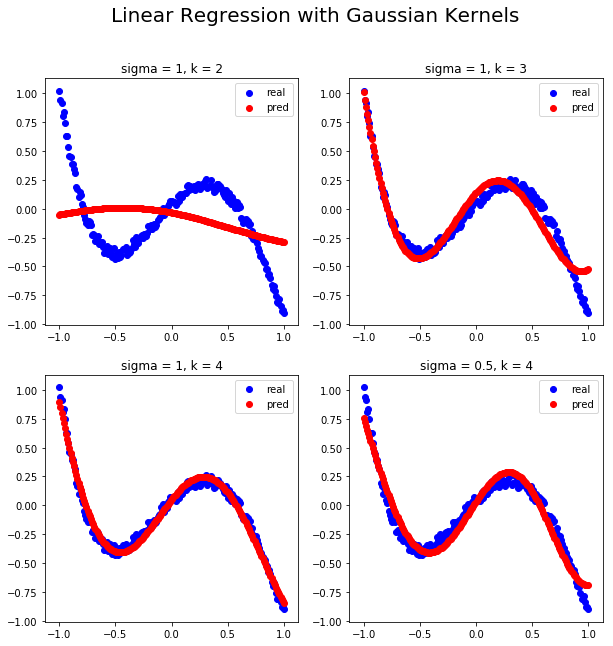

In [7]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Linear Regression with Gaussian Kernels", fontsize=20)

ks = [2,3,4,4]
sigmas = [1,1,1,0.5]
shape = [2,2]
for i,params in enumerate(zip(ks,sigmas)):
    k, sigma = params
    Y_ = kernel_reg(X, Y, k, sigma)
    plt.subplot(*shape,i+1)
    plt.scatter(X, Y, c = 'b', label='real')
    plt.scatter(X, Y_, c= 'r', label='pred')
    plt.title('sigma = '+str(sigma)+', k = '+str(k))
    plt.legend()
plt.show()

### Ridge

In [8]:
def ridge_reg(X, Y, lambda_=1, k=3):
    X = linear_base(X, k)
    I = np.identity(X.shape[-1])
    W = (np.linalg.inv(X.T@X+lambda_*I)@(X.T))@Y
    Y_ = X@W
    return Y_

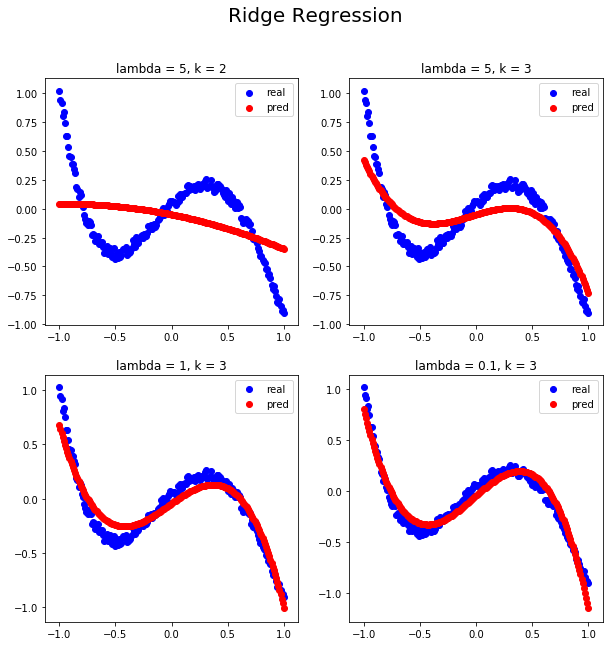

In [10]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Ridge Regression", fontsize=20)

lambdas = [5,5,1,0.1]
ks = [2,3,3,3]
shape = [2,2]
for i,params in enumerate(zip(lambdas,ks)):
    lambda_, k = params
    Y_ = ridge_reg(X, Y, lambda_, k)
    plt.subplot(*shape,i+1)
    plt.scatter(X, Y, c = 'b', label='real')
    plt.scatter(X, Y_, c= 'r', label='pred')
    plt.title('lambda = '+str(lambda_)+', k = '+str(k))
    plt.legend()
plt.show()